In [ ]:
# !pip install keras
# !pip install tensorflow
# !pip install yfinance

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [7]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327454,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702934,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676109,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.095566,144114400


In [10]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [11]:
df = df.drop(['Date'], axis = 1)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
0,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
3,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,7.510714,7.571429,7.466429,7.570714,6.425996,447610800
...,...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2511,71.172501,71.222504,70.730003,71.067497,69.327454,48478800
2512,71.205002,72.495003,71.175003,72.477501,70.702934,93121200
2513,72.779999,73.492500,72.029999,72.449997,70.676109,146266000


In [13]:
df = df.drop(['Adj Close'], axis = 1)

In [14]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


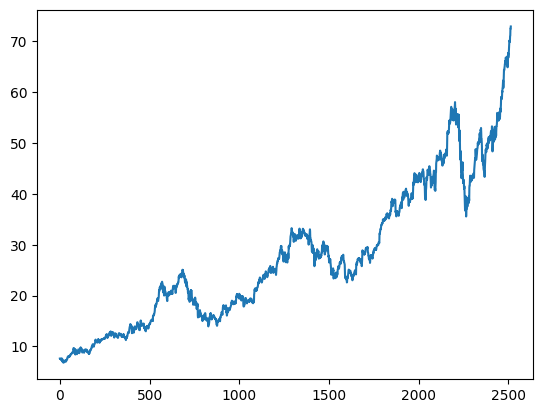

In [15]:
plt.plot(df.Close)

In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

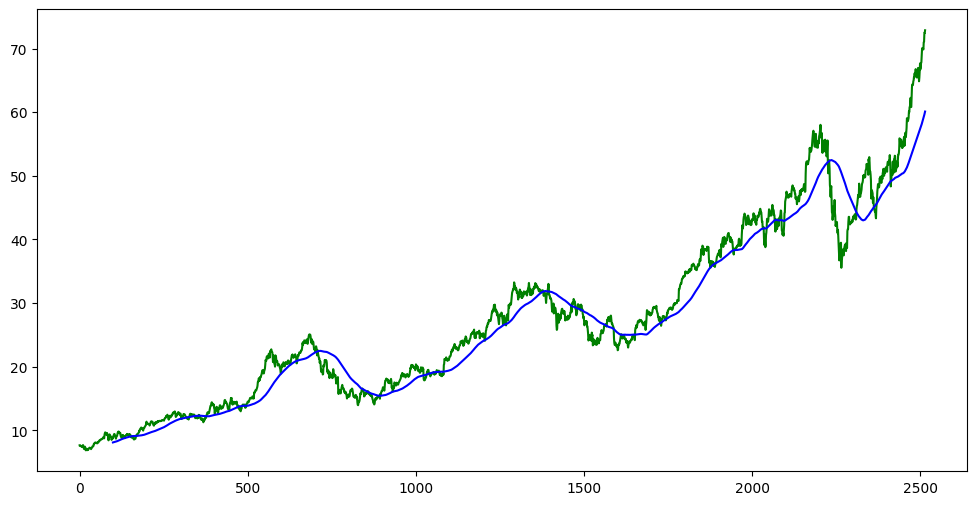

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, 'g')
plt.plot(ma100, 'b')

In [18]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

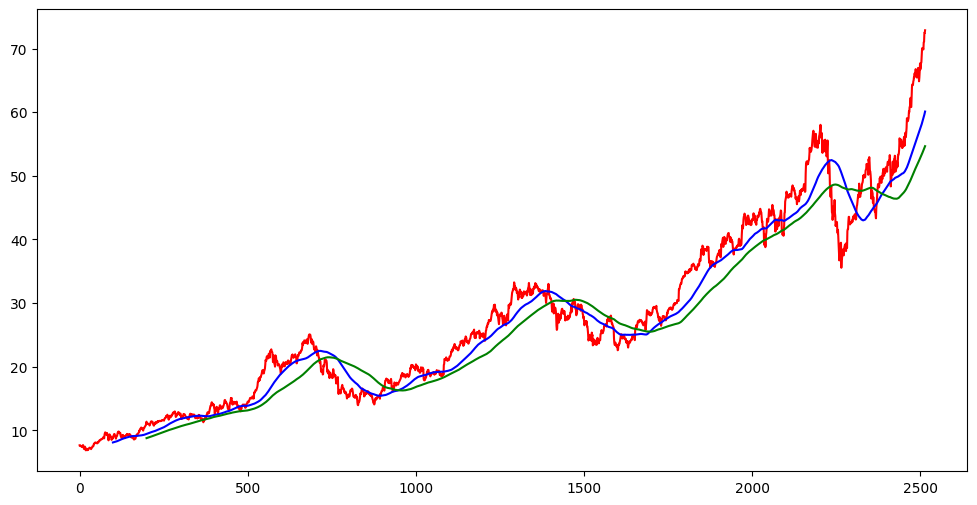

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, 'r')
plt.plot(ma100, 'b')
plt.plot(ma200, 'g')

In [20]:
df.shape

(2515, 5)

In [21]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

In [22]:
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [23]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [24]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [26]:
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [28]:
data_training_array.shape

(1760, 1)

In [29]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [ ]:
y_train

In [31]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train

array([[[0.02971782],
        [0.03021854],
        [0.02560389],
        ...,
        [0.07403745],
        [0.07195343],
        [0.07045129]],

       [[0.03021854],
        [0.02560389],
        [0.02507608],
        ...,
        [0.07195343],
        [0.07045129],
        [0.08295551]],

       [[0.02560389],
        [0.02507608],
        [0.02697067],
        ...,
        [0.07045129],
        [0.08295551],
        [0.08773258]],

       ...,

       [[0.74224237],
        [0.74300022],
        [0.7582516 ],
        ...,
        [0.84795991],
        [0.84900194],
        [0.84170783]],

       [[0.74300022],
        [0.7582516 ],
        [0.76668248],
        ...,
        [0.84900194],
        [0.84170783],
        [0.84388656]],

       [[0.7582516 ],
        [0.76668248],
        [0.7708505 ],
        ...,
        [0.84170783],
        [0.84388656],
        [0.85089656]]])

In [39]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



#2nd
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


#3rd
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


#4th
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [41]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =50 )

Epoch 1/50
52/52 [==============================] - 6s 96ms/step - loss: 0.0893
Epoch 2/50
52/52 [==============================] - 5s 97ms/step - loss: 0.0135
Epoch 3/50
52/52 [==============================] - 5s 100ms/step - loss: 0.0098
Epoch 4/50
52/52 [==============================] - 5s 102ms/step - loss: 0.0091
Epoch 5/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0080
Epoch 6/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0076
Epoch 7/50
52/52 [==============================] - 5s 98ms/step - loss: 0.0083
Epoch 8/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0078
Epoch 9/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0086
Epoch 10/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0072
Epoch 11/50
52/52 [==============================] - 5s 100ms/step - loss: 0.0077
Epoch 12/50
52/52 [==============================] - 5s 103ms/step - loss: 0.0063
Epoch 13/50
52/52 [==============

In [ ]:
model.save('keras_model.h5')

In [43]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [44]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [45]:
past_100_days = data_training.tail(100)

In [46]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [47]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [48]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data

In [50]:
input_data.shape

(855, 1)

In [51]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [52]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [53]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 27ms/step


In [54]:
y_predicted.shape

(755, 1)

In [55]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [ ]:
y_predicted

In [57]:
scaler.scale_

array([0.02123255])

In [58]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

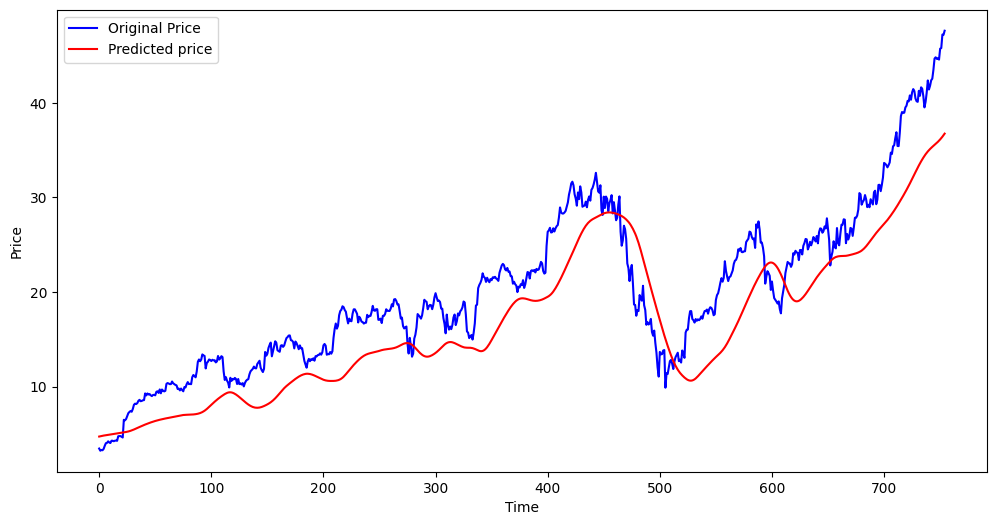

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()